In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from lib.process_data import * 
from lib.util_ml_helpers import *
from lib.util_xai_plot import *

In [2]:
# set up plotting theme and configurations
#plt.style.available # to find all the style available to matplotlib
plt.style.use('ggplot') 

<h3>Loading cancer data and classification model</h3>

In [3]:
# loading bike data
cols_cat, cancer_df = process_cancer("./data/cervical.csv")
feature_cols = cols_cat.get("num_std") + cols_cat.get('ordinal')
resp = cols_cat.get('resp')
X = cancer_df[feature_cols].to_numpy()
y = cancer_df[resp].to_numpy()

In [4]:
# loading bike model and fetching predicted value along with bike_df
logistic_model = pickle.load(open("./model/cancer_logistic.sav",'rb'))
gradient_tree_model = pickle.load(open("./model/cancer_boost_tree.sav",'rb'))
outcome_df = pd.DataFrame(data=np.hstack([X
    , y.reshape(-1,1)
    , logistic_model.predict_proba(X).reshape(-1,2)
    , gradient_tree_model.predict_proba(X).reshape(-1,2)
]), columns = feature_cols + ['actual','logistic_prob0', 'logistic_prob1','tree_prob0', 'tree_prob1'])
outcome_df.head(5)

e:\Projects\Envs\Repo\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
e:\Projects\Envs\Repo\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


,age_std,num_of_sex_partners_std,first_sex_std,num_of_pregn_std,smokes_yrs_std,hormonal_contrpt_yrs_std,iud_yrs_std,stds_time_since_1diagn_std,stds_time_since_ldiagn_std,smokes,hormonal_contrpt,iud,stds,stds_num,stds_num_diagn,actual,logistic_prob0,logistic_prob1,tree_prob0,tree_prob1
0,0.070423,0.111111,0.227273,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535463,0.464537,0.592939,0.407061
1,0.028169,0.000000,0.181818,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.536454,0.463546,0.592939,0.407061
2,0.295775,0.000000,0.227273,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.520965,0.479035,0.556520,0.443480
3,0.549296,0.148148,0.272727,0.363636,1.0,0.1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.506932,0.493068,0.482965,0.517035
4,0.464789,0.074074,0.500000,0.363636,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.462324,0.537676,0.431674,0.568326


In [5]:
# logistic's coef table
feature_df = pd.DataFrame(np.hstack([
    np.array(feature_cols).reshape(-1,1)\
    , logistic_model.coef_.reshape(-1,1)])\
    , columns=['features','coef'])
feature_df

,features,coef
0,age_std,0.2301321484254679
1,num_of_sex_partners_std,-0.056879230749699444
2,first_sex_std,0.01281340928740829
3,num_of_pregn_std,0.11348705272405453
4,smokes_yrs_std,0.14284245661821732
5,hormonal_contrpt_yrs_std,0.827991344737409
6,iud_yrs_std,0.05821189096244198
7,stds_time_since_1diagn_std,-0.0031713766276668144
8,stds_time_since_ldiagn_std,0.04462853879238517
9,smokes,-0.0026893106676068416


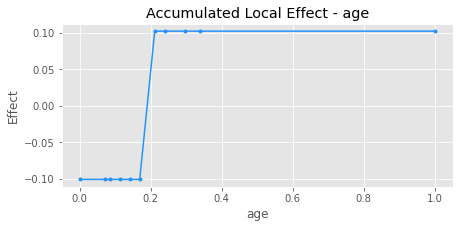

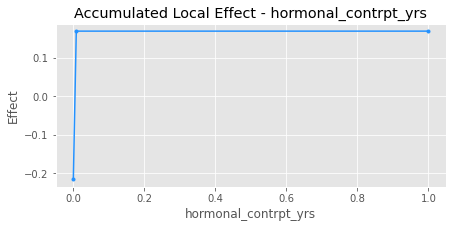

In [6]:
#plotting variables for cancer data
plot_ale(gradient_tree_model,'classification', X, var_idx=0, var_cd='numerical', var_name="age",n_split=10)
plt.show()
plot_ale(gradient_tree_model,'classification', X, var_idx=5, var_cd='numerical', var_name="hormonal_contrpt_yrs",n_split=2)
plt.show()


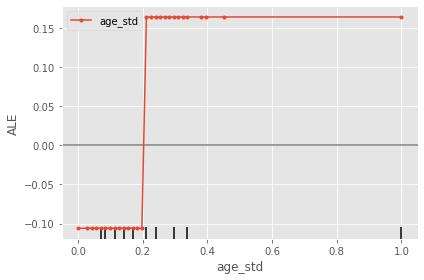

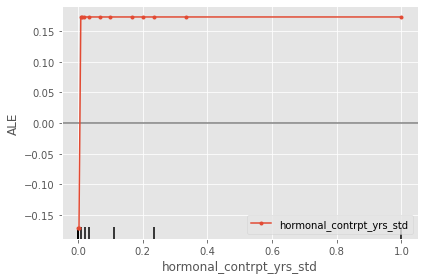

In [7]:
from alibi.explainers import ALE, plot_ale
for item in ['age_std','hormonal_contrpt_yrs_std']:
    ale_handler = ALE(gradient_tree_model.predict, feature_names=feature_cols, target_names = [item])
    ale_exp = ale_handler.explain(X)
    g = plot_ale(ale_exp, features=[item])
    plt.show()